<a href="https://colab.research.google.com/github/Sumin0411/SKTFlyAI/blob/main/cat_dog_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# cats =0 , dogs=1 로 라벨링
# input = 224, 244, 3
# 합성곱 신경망 컬러 이미지 이진분류

In [28]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2024-01-02 07:19:06--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M  20.0MB/s    in 4.1s    

2024-01-02 07:19:11 (16.0 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [29]:
!unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
replace cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
data_root = '/content/cats_and_dogs_filtered'
train_dir = '/content/cats_and_dogs_filtered/train'
val_dir = '/content/cats_and_dogs_filtered/validation'

In [3]:
import os

# 파일명 리스트 획득

train_cats_fname = os.listdir(os.path.join(train_dir, 'cats'))
train_dogs_fname = os.listdir(os.path.join(train_dir, 'dogs'))

print('cats:', len(train_cats_fname))
print('dogs:', len(train_dogs_fname))

cats: 1000
dogs: 1000


### 1. 레이블 명
* cats=0, dogs=1

In [4]:
class_name = ['cat', 'dog']

In [5]:
import PIL

X_train = []
y_train = []

for i in range(len(train_cats_fname)):
  f = os.path.join(train_dir, 'cats', train_cats_fname[i])
  image = PIL.Image.open(f)
  image = image.resize((224,224))
  arr = np.array(image)
  X_train.append(arr)
  y_train.append(0)

In [6]:
for i in range(len(train_dogs_fname)):
    f = os.path.join(train_dir, 'dogs', train_dogs_fname[i])
    image = PIL.Image.open(f)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(1)

### 2. 데이터 전처리

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = 'cats_and_dogs_filtered/train'
validation_dir = 'cats_and_dogs_filtered/validation'

# 정규화
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


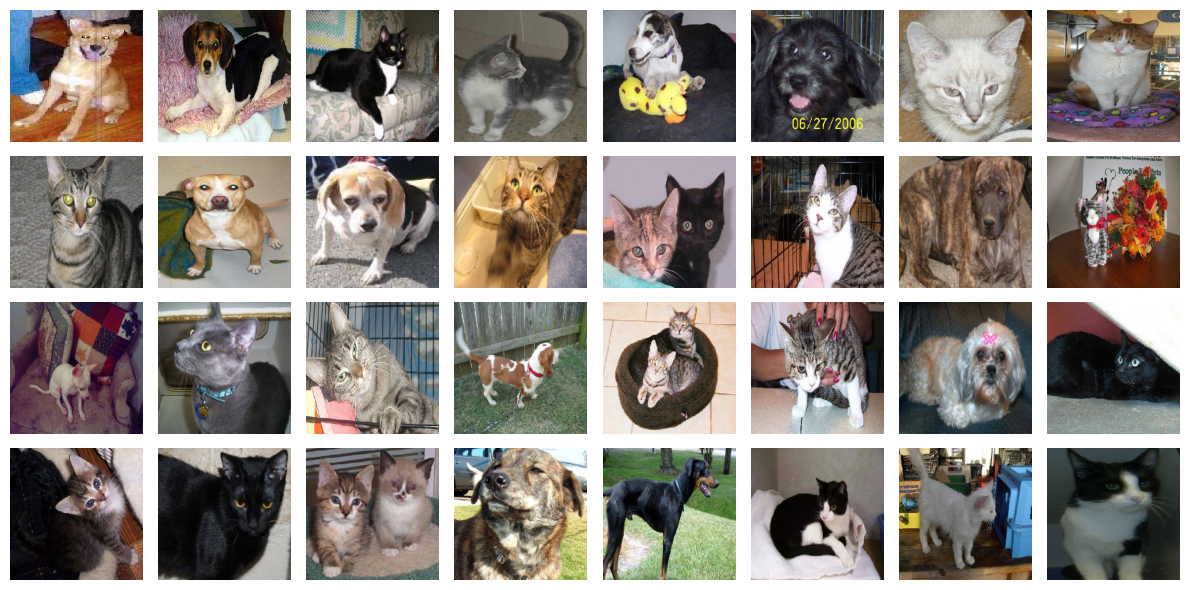

In [8]:
images, labels = next(train_generator)

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
axes = axes.ravel()

for i in range(len(images)):
    axes[i].imshow(images[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### 3. 모델 만들기

In [9]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (32, 224, 224, 3)
배치 레이블 크기: (32,)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    batch_size=32,
)

Epoch 1/10
63/63 [==============================] - 19s 183ms/step - loss: 0.7174 - accuracy: 0.5405 - val_loss: 0.6696 - val_accuracy: 0.6390
Epoch 2/10
63/63 [==============================] - 9s 147ms/step - loss: 0.6446 - accuracy: 0.6115 - val_loss: 0.5874 - val_accuracy: 0.6890
Epoch 3/10
63/63 [==============================] - 10s 155ms/step - loss: 0.5711 - accuracy: 0.6940 - val_loss: 0.5626 - val_accuracy: 0.7250
Epoch 4/10
63/63 [==============================] - 7s 113ms/step - loss: 0.5083 - accuracy: 0.7585 - val_loss: 0.5830 - val_accuracy: 0.7050
Epoch 5/10
63/63 [==============================] - 8s 128ms/step - loss: 0.4171 - accuracy: 0.8155 - val_loss: 0.6241 - val_accuracy: 0.6970
Epoch 6/10
63/63 [==============================] - 8s 125ms/step - loss: 0.3299 - accuracy: 0.8550 - val_loss: 0.6907 - val_accuracy: 0.7270
Epoch 7/10
63/63 [==============================] - 7s 114ms/step - loss: 0.2278 - accuracy: 0.8965 - val_loss: 0.8484 - val_accuracy: 0.7370
Epoc

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [13]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1,2,1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.legend()
    plt.show()

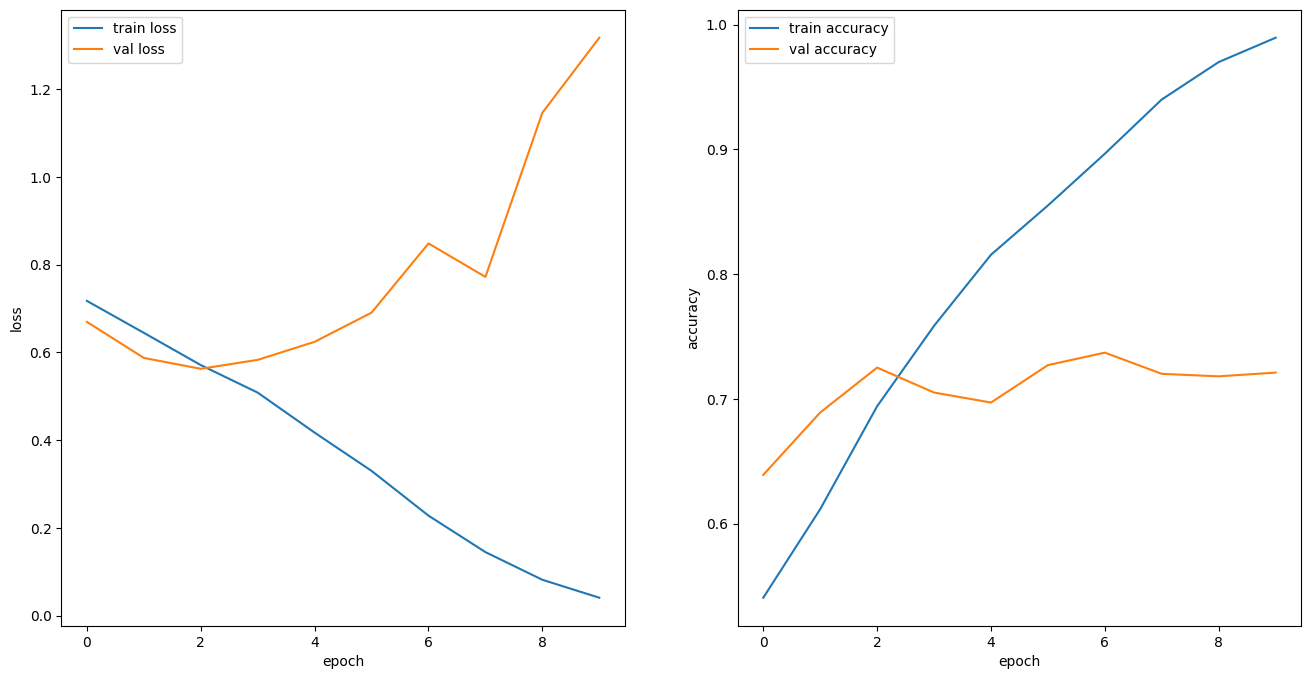

In [14]:
plot_history(history)

In [15]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
print("train_acc : ", train_accuracy)
print("validation_acc : ", validation_accuracy)

train_acc :  [0.5404999852180481, 0.6115000247955322, 0.6940000057220459, 0.7584999799728394, 0.815500020980835, 0.8550000190734863, 0.8964999914169312, 0.9399999976158142, 0.9700000286102295, 0.9894999861717224]
validation_acc :  [0.6389999985694885, 0.6890000104904175, 0.7250000238418579, 0.7049999833106995, 0.6970000267028809, 0.7269999980926514, 0.7369999885559082, 0.7200000286102295, 0.7179999947547913, 0.7210000157356262]
